# Multilayer perceptron (MLP)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
import sys
# module_path = "C:\_AOStuff\Development\ml-ai\generative2\Generative_Deep_Learning_2nd_Edition"
# if module_path not in sys.path:
#     sys.path.append(module_path)

In [3]:
sys.path

['/app',
 '/app',
 '/usr/lib/python38.zip',
 '/usr/lib/python3.8',
 '/usr/lib/python3.8/lib-dynload',
 '',
 '/usr/local/lib/python3.8/dist-packages',
 '/usr/lib/python3/dist-packages']

In [4]:
# pwd

In [5]:
from tensorflow.keras import layers, models, optimizers, utils, datasets
from notebooks.utils import display

2023-05-17 12:00:38.543042: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-17 12:00:38.666758: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Andre Setup

In [6]:
! pip install --no-index -f https://github.com/dreoporto/ptmlib/releases ptmlib

from ptmlib.time import Stopwatch, AlertSounds
import ptmlib.model_tools as modt

Looking in links: https://github.com/dreoporto/ptmlib/releases


In [7]:
from time import sleep
stopwatch = Stopwatch()

In [8]:
stopwatch.start()
sleep(3)
stopwatch.stop()

Start Time: Wed May 17 12:00:41 2023
End Time:   Wed May 17 12:00:44 2023
Elapsed seconds: 3.0032 (0.05 minutes)


In [9]:
import os
import sys

print(os.getcwd())
print(sys.argv[0])
print(os.path.dirname(os.path.realpath('__file__')))

print(os.path.dirname(sys.executable))
# print(os.path.dirname(__file__))

/app
/usr/local/lib/python3.8/dist-packages/ipykernel_launcher.py
/app
/usr/bin


In [10]:
main_stopwatch = Stopwatch()
main_stopwatch.start()

Start Time: Wed May 17 12:00:44 2023


## 0 Parameters

In [11]:
NUM_CLASSES = 10

## 1. Prepare the Data

In [12]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [13]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [14]:
y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_test = utils.to_categorical(y_test, NUM_CLASSES)

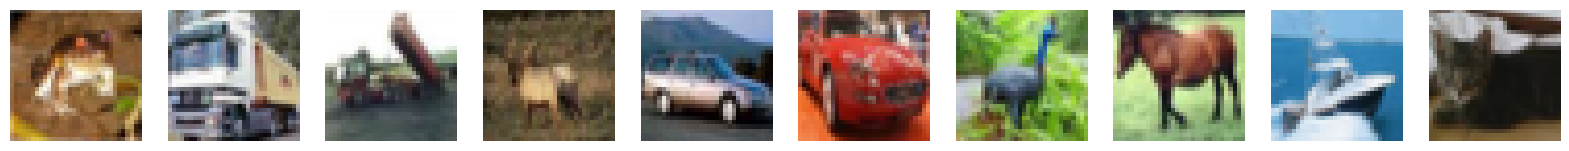

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [15]:
display(x_train[:10])
print(y_train[:10])

## 2. Build the model 

In [16]:
input_layer = layers.Input((32, 32, 3))

x = layers.Flatten()(input_layer)
x = layers.Dense(200, activation="relu")(x)
x = layers.Dense(150, activation="relu")(x)

output_layer = layers.Dense(NUM_CLASSES, activation="softmax")(x)

model = models.Model(input_layer, output_layer)

model.summary()

2023-05-17 12:00:45.469198: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-17 12:00:45.471208: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-17 12:00:45.471411: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-17 12:00:45.471669: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 200)               614600    
                                                                 
 dense_1 (Dense)             (None, 150)               30150     
                                                                 
 dense_2 (Dense)             (None, 10)                1510      
                                                                 
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


## 3. Train the model

In [17]:
opt = optimizers.Adam(learning_rate=0.0005)
model.compile(
    loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"]
)

In [18]:
stopwatch = Stopwatch()
stopwatch.start()

model.fit(x_train, y_train, batch_size=32, epochs=10, shuffle=True)

stopwatch.stop()

Start Time: Wed May 17 12:00:46 2023
Epoch 1/10


2023-05-17 12:00:46.902251: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.
2023-05-17 12:00:47.176279: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 [==============================] - 11s 7ms/step - loss: 1.8431 - accuracy: 0.3358
Epoch 2/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.6654 - accuracy: 0.4041
Epoch 3/10
1563/1563 [==============================] - 12s 7ms/step - loss: 1.5905 - accuracy: 0.4327
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.5353 - accuracy: 0.4525
Epoch 5/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.5002 - accuracy: 0.4648
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4675 - accuracy: 0.4761
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4402 - accuracy: 0.4861
Epoch 8/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4167 - accuracy: 0.4976
Epoch 9/10
1563/1563 [==============================] - 12s 7ms/step - loss: 1.3965 - accuracy: 0.5048
Epoch 10/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.3778

## 4. Evaluation

In [19]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.4907 - accuracy: 0.4796


[1.490692377090454, 0.4796000123023987]

In [20]:
CLASSES = np.array([
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
])

preds = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [21]:
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

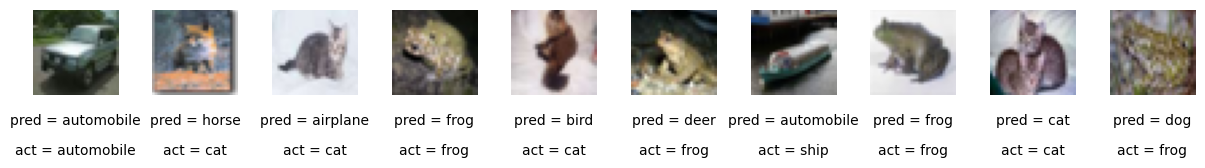

In [22]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis('off')
    ax.text(
        0.5,
        -0.35,
        'pred = ' + str(preds_single[idx]),
        fontsize=10,
        ha='center',
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        'act = ' + str(actual_single[idx]),
        fontsize=10,
        ha='center',
        transform=ax.transAxes,
    )
    ax.imshow(img)

In [23]:
# ALL DONE!

main_stopwatch.stop(sound_path=AlertSounds.DORE)

End Time:   Wed May 17 12:02:46 2023
Elapsed seconds: 121.5756 (2.03 minutes)
